

# Project: Investigate a Dataset (No Show Appointments)
 - kagglev2 , May 2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> <font color=blue>**Summary**</font>
>>This analysis is designed to explore appointment show up rates in the Brazilian public health system dataset. The dataset [https://www.kaggle.com/joniarroba/noshowappointments] comprise of approximately 100k medical appointments. We will dive into the patients’ attendance for appointments scheduled using the following variables:
***
><font color=blue>**Variables**</font>
<font color=green>
>>*Dependent variable*: missed appointment (no-show)
<font color=green>
>>
>>*Independent variables*:
>><font color=green>
>> -  gender: patient’s gender
>> -  day of appointment: the day of the appointment
>> -  generation (age group): the generation the patient belongs to
>> -  average waiting days between scheduled date and appointment date
>> -  illness and disability: patient has illness or vs a disabled patient 
>> -  health status: patient is healthy vs patient with an illness
>> -  text reminders

***
> <font color=blue>**Data**</font>

>>This dataset contains appointments dated from 29th April 2016 up to 08th June 2016. Total days excluding non-working days are 27 days.
>> 
>>**Original dataset** Original dataset retrieved from Kaggle (110527 records with 23 columns)
>> 
>>Column information:
>> 
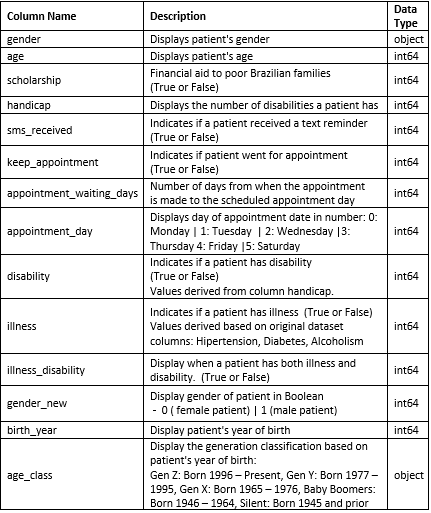

>>**New dataset** New dataset was created to be used for analysis(110514 records with 14 columns)
>> 
>>Column information:
>> 
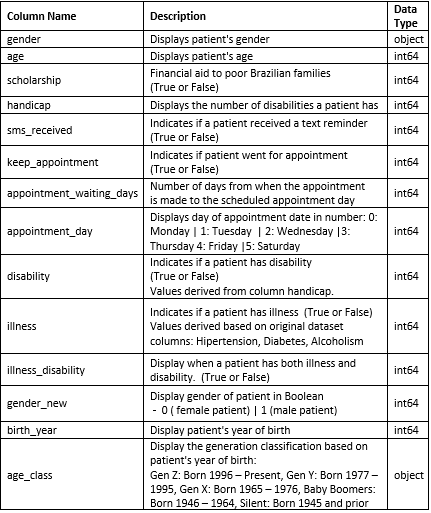
***
> <font color=blue>**Research Questions**</font>
>>
>> 1.	How many percent of Patients keep their appointments?
>> 1.	Which Gender has a higher turnout rate with their appointments?
>> 1.	What is the Relationship between Generation and Appointment Turnouts?
>> 1.	Do people keep their appointment more on a particular day?
>> 1.	Do Average Waiting Days Influence Patients' Turnouts?
>> 1.	Does an illness or disability or both, influence a patient's appointment turnout rate?
>> 1.	Do healthy patients tend to have a higher appointment show up rates
>> 1.	Do text reminders play a role in appointment show up rates?


In [1]:
# Set up import statements for all of the packages to use.

#   include 'magic word' (%) so that visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> -  Load in the data
> -  Check data structure for cleanliness
> -  Trim and clean dataset for analysis


### General Properties

In [2]:
# Load data and print out a few lines to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



#### Structure of Dataset

1.Create new dataset to work on, leaving original as a reference point


2.Identify the following in dataset :

*size of dataset

*view data types (Identify data type conversions required) and look for any missing rows

*null values

*duplicates by row and columns (Patient ID, Appointment ID)

*unique values

*snapshot/ summary of dataset
*amend column labels and set them to lower case for ease accessibility throughout analysis

In [3]:
#Create new dataset to work on, df_new
df_new= df.copy()
df_new.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#size of dataset
df_new.shape

(110527, 14)

**Observation:** There are 110,527 rows and 14 columns in this dataset.







In [5]:
#view data types (Identify data type conversions required) and look for any missing rows
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Observations:**

There are 110,527 rows and 14 columns in this dataset with row index ranging from 0 to 110,526.

The dataset contains no missing rows.

Following Columns will require data type conversions:

1. PatientID : Convert to integer

2. Gender: Convert to boolean

3. ScheduledDay and AppointmentDay: Convert to datetime

4. No-show:Convert to boolean


In [6]:
#identify any null values count for each feature
df_new.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Observation:** The dataset contains no null values



In [7]:
#identify duplicates by rows
df_new.duplicated().sum()

0

**Observation:** The dataset contains no duplicate values


In [8]:
#identify duplicates by column, Patient ID
df_new.duplicated('PatientId').sum()

48228

**Observation:** The dataset contains duplicate values for Patient ID.
 This could mean that there are patients with several appointments in this dataset.
 This will be investigated further at the data cleaning stage.

In [9]:
#identify duplicates by column, Appointment ID
df_new.duplicated('AppointmentID').sum()

0

**Observation:** The dataset contains no duplicate values for Appointment ID



In [10]:
#identify unique values for each column
df_new.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


**Observations:**

1. There are 62,299 patients scheduled for appointments

2. There are over 100,000 appointments scheduled for a total of 27 days

3. Patients originate from 81 different areas


In [11]:
# list out unique values for each column
for col in list(df_new):
  print(col)
  print (np.sort(df_new[col].unique()))


PatientId
[3.92178444e+04 4.37417565e+04 9.37795293e+04 ... 9.99946537e+14
 9.99968578e+14 9.99981632e+14]
AppointmentID
[5030230 5122866 5134197 ... 5790466 5790481 5790484]
Gender
['F' 'M']
ScheduledDay
['2015-11-10T07:13:56Z' '2015-12-03T08:17:28Z' '2015-12-07T10:40:59Z' ...
 '2016-06-08T19:33:23Z' '2016-06-08T19:58:52Z' '2016-06-08T20:07:23Z']
AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-02T00:00:00Z' '2016-05-03T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-05T00:00:00Z' '2016-05-06T00:00:00Z'
 '2016-05-09T00:00:00Z' '2016-05-10T00:00:00Z' '2016-05-11T00:00:00Z'
 '2016-05-12T00:00:00Z' '2016-05-13T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-05-16T00:00:00Z' '2016-05-17T00:00:00Z' '2016-05-18T00:00:00Z'
 '2016-05-19T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-24T00:00:00Z'
 '2016-05-25T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-06-01T00:00:00Z' '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z'
 '2016-06-06T00:00:00Z' '2016-06-07T00:00:00Z' '2016-06-08T00:00:00Z']
Age


**Observations:**

*Age:*
There seems to be an anomaly in age, the youngest person is -1 years old. The oldest person is a 115 years old and according to Worldbank, the life expectancy in Brazil is 75.5 - See: https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=BR
Will need to investigate further on the age range(min, max) in this dataset - This will be looked at in the data cleaning phase.

*Appointment date:*
The appointment date in this dataset begins on 29th April 2016 up to 08th June 2016. Total days excluding non-working days is 27 days. There is no timestamp in the date for the appointment date. Time will be omitted from this field in the cleaning phase.

*Scheduled date:*
In this dataset, appointments have been set up since 10th November 2016 up to 08th June 2016.
There is timestamp in the scheduled date. However, time will be omitted in the cleaning phase because it cannot be compared against appointment date.


In [12]:
#View snapshot of values in dataset 
df_new.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
#amend column labels and set them to lower case for ease accessibility throughout analysis
df_new.rename(columns={'PatientId': 'Patient_ID', 
                       'ScheduledDay':'Scheduled_Date',
                       'AppointmentDay':'Appointment_Date',
                       'Hipertension': 'Hypertension', 
                       'Handcap': 'Handicap',
                       'No-show': 'No_show'
                                                            }, inplace=True)
df_new.head(1)

,Patient_ID,AppointmentID,Gender,Scheduled_Date,Appointment_Date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
#change column names to be in lower case 
df_new.columns = df_new.columns.str.lower()
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Data Cleaning 

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.



#####  >Part 1 - Data Cleaning: Change Data Types
#####  >Part 2 - Data Cleaning: Create New Columns
#####  >Part 3 - Data Cleaning: Verify validity of  data for age and appointment date
#####  >Part 4 - Data Cleaning: Drop Columns and Rows
#####  >Part 5 - Data Cleaning: Data Audit after cleaning data



                

**Part 1 - Data Cleaning: Change Data Types**


In [16]:
#Change data type for patient_id from float to int64
df_new['patient_id'] = df_new['patient_id'].astype(np.int64)


In [17]:
#Change data type for appointment_date from string to date and removing the timestamp
df_new['appointment_date']= pd.to_datetime(df_new['appointment_date'])
df_new['appointment_date']=(df_new['appointment_date']).apply(lambda x: x.strftime('%m-%d-%Y')) 
df_new['appointment_date']= pd.to_datetime(df_new['appointment_date'])

In [18]:
#Change data type for scheduled_date from string to date and removing the timestamp
df_new['scheduled_date'] = pd.to_datetime(df_new['scheduled_date'])
df_new['scheduled_date']=(df_new['scheduled_date']).apply(lambda x: x.strftime('%m-%d-%Y')) 
df_new['scheduled_date'] = pd.to_datetime(df_new['scheduled_date'])

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id          110527 non-null int64
appointmentid       110527 non-null int64
gender              110527 non-null object
scheduled_date      110527 non-null datetime64[ns]
appointment_date    110527 non-null datetime64[ns]
age                 110527 non-null int64
neighbourhood       110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicap            110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


**Observations:**

1. Data type for patient_id is now integer

2. Scheduled date and appointment date are now in date time format

In [20]:
df_new.head(2)

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


**Part 2 - Data Cleaning: Create New Columns**

New columns will be created to help analysis purposes:

1. keep_appointment : Display if a patient keeps/attends appointment in boolean, based on column no_show 


2. appointment_waiting_days : Number of days from when the appointment is made to the scheduled appointment day 


3. appointment_day: Display day of appointment date in number:
 - 0: Monday
 - 1: Tuesday
 - 2: Wednesday
 - 3: Thursday
 - 4: Friday
 - 5: Saturday


4. disability: Display column handicap in boolean


5. illness: Collate the three types of illnesses (hypertension, diabetes, alcoholism) indicating if a patient is with or without a illness.
 -   0: A patient has none of the three illnesses
 -   1: A patient has one or more of the three illnesses 


6. illness_disability: Display patients with both illness and disability
 -   0: A patient has no illness and disabilitys
 -   1: A patient has both illness and disability


7. gender_new: Display gender of patient in boolean
 -  0 denotes female patient
 -  1 denotes male patient 


8. birth_year: Display patient's year of birth


9. age_class: Display the generation classification based on patient's year of birth:
 - Gen Z: Born 1996 – Present
 - Gen Y: Born 1977 – 1995
 - Gen X: Born 1965 – 1976
 - Baby Boomers: Born 1946 – 1964
 - Silent: Born 1945 and before
 

In [21]:
#Creating new column, "keep_appointment" to display patients who attended their appointment, based on the values of column no_show in boolean
# 1 denotes patient went for appointment (In column no_show, a person who went for their appointment is represented as 'no')
# 0 denotes patient did not go for appointment(In column no_show, a person who went for their appointment is represented as 'yes')

df_new['keep_appointment'] = df_new['no_show']
df_new['keep_appointment'].replace(['No', 'Yes'],['1','0'],inplace=True)
df_new['keep_appointment']=df_new['keep_appointment'].astype(np.int64)
df_new.head(2)

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,keep_appointment
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1


In [22]:
# creating new column, "appointment_waiting_days" to display 
# number of days from when the appointment is made to the scheduled appointment day 

df_new['appointment_waiting_days'] = (df_new.appointment_date - df_new.scheduled_date).dt.days
df_new.head(2)

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,keep_appointment,appointment_waiting_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0


In [23]:
#Creating new column "appointment_day" to show day of appointment date
#The day of the week with Monday=0, Sunday=6
#df_new['appointment_day'] = df_new.appointment_date.dt.weekday_name
df_new['appointment_day'] = df_new.appointment_date.dt.weekday
df_new.head(2)

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,keep_appointment,appointment_waiting_days,appointment_day
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,4
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,4


In [24]:
#Creating new column, "disability" to display handicap values in boolean
# 0 denotes patient without disability
# 1 denotes patient with disability
df_new["disability"] = (df_new['handicap']  > 0).astype(np.int64)
df_new.head(2)

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,keep_appointment,appointment_waiting_days,appointment_day,disability
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,4,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,4,0


In [25]:
# Creating new column, "illness" to collate the three types of illnesses 
# indicating if a patient is with or without illness
# This is indicative by 
# 0: A patient has none of the three illnesses 
# 1: A patient has one or more of the three illnesses 
 
df_new['illness']=df_new['hypertension'] + df_new['diabetes']+ df_new['alcoholism']
df_new['illness'] = (df_new['illness'] > 0).astype(np.int64)
df_new.head(2)

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,keep_appointment,appointment_waiting_days,appointment_day,disability,illness
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,4,0,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,4,0,0


In [26]:
# Creating new column, illness_disability: Display patients with both illness and disability
#0: A patient has no illness and disability
#1: A patient has both illness and disability
df_new['illness_disability'] =df_new['illness'] + df_new["disability"] 
df_new["illness_disability"]= (df_new["illness_disability"]  > 1).astype(np.int64)
#df_new.head(2)
df_new.query('illness_disability != 0').shape

(1044, 20)

In [27]:
#Creating new column, "gender_new" to display Gender values in boolean
# 0 denotes female patient
# 1 denotes male patient 

df_new["gender_new"] = (df_new['gender']  == 'F').astype(np.int64)
df_new["gender_new"] = (df_new['gender']  == 'M').astype(np.int64)

df_new.head(2)

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,...,handicap,sms_received,no_show,keep_appointment,appointment_waiting_days,appointment_day,disability,illness,illness_disability,gender_new
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,No,1,0,4,0,1,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,No,1,0,4,0,0,0,1


In [28]:
df_new.groupby([df_new.gender_new]).size()

gender_new
0    71840
1    38687
dtype: int64

In [29]:
# Creating two new columns:
# "birth_year" to display patient's year of birth
# "age_class" to display the generation classification based on patient's year of birth
#  - Gen Z: Born 1996 – Present
#  - Gen Y: Born 1977 – 1995
#  - Gen X: Born 1965 – 1976
#  - Baby Boomers: Born 1946 – 1964
#  - Silent: Born 1945 and before

df_new['birth_year']= 2016- df_new['age']
df_new['age_class']=np.where(df_new['birth_year']<=1945, 'Silent', np.where(df_new['birth_year']<=1964, 'Baby Boomers', np.where(df_new['birth_year']<=1976, 'Gen X',np.where(df_new['birth_year']<=1995, 'Gen Y',np.where(df_new['birth_year']<=2019, 'Gen Z','na')))))
df_new.head(2)

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,...,no_show,keep_appointment,appointment_waiting_days,appointment_day,disability,illness,illness_disability,gender_new,birth_year,age_class
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,No,1,0,4,0,1,0,0,1954,Baby Boomers
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,No,1,0,4,0,0,0,1,1960,Baby Boomers


**Part 3 - Data Cleaning: Verify validity of  data for age and appointment date**


In [30]:
# Investigate on patient ID as there were duplicates
df_new['patient_id'].value_counts().head(10)

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
75797461494159     62
258424392677       62
871374938638855    62
66844879846766     57
872278549442       55
Name: patient_id, dtype: int64

>**Observations:**

> -  The highest number of appointments held by one patient is 88 times within the span of 27 days.
> -  This seems weird as this would mean that the patient has 3.26 appointments per day consequtively for a total of 27 days.
> -  This could be due to an error during appointment scheduling caused by a system anomaly that duplicated the entries. As the data does not seem viable, this column will be dropped from use in this analysis

In [31]:
# View record where age is -1
df_new.query('age < 0')

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,...,no_show,keep_appointment,appointment_waiting_days,appointment_day,disability,illness,illness_disability,gender_new,birth_year,age_class
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,...,No,1,0,0,0,0,0,0,2017,Gen Z


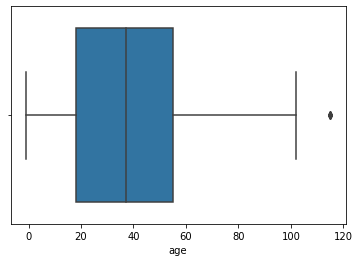

In [32]:
#Create a boxplot to determine the outliers in column Age
sns.boxplot(x=df_new['age'])
#Reference:https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

>**Observation:**

>1. The box plot depicts an outlier for ages above 100. These records will be removed from dataset

In [33]:
# View records where age is more than 100
df_new.query('age > 100')

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,...,no_show,keep_appointment,appointment_waiting_days,appointment_day,disability,illness,illness_disability,gender_new,birth_year,age_class
58014,976294799775439,5651757,F,2016-05-03,2016-05-03,102,CONQUISTA,0,0,0,...,No,1,0,1,0,0,0,0,1914,Silent
63912,31963211613981,5700278,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,...,Yes,0,3,3,1,0,0,0,1901,Silent
63915,31963211613981,5700279,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,...,Yes,0,3,3,1,0,0,0,1901,Silent
68127,31963211613981,5562812,F,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,...,Yes,0,38,0,1,0,0,0,1901,Silent
76284,31963211613981,5744037,F,2016-05-30,2016-05-30,115,ANDORINHAS,0,0,0,...,No,1,0,0,1,0,0,0,1901,Silent
90372,234283596548,5751563,F,2016-05-31,2016-06-02,102,MARIA ORTIZ,0,0,0,...,No,1,2,3,0,0,0,0,1914,Silent
97666,748234579244724,5717451,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,0,1,0,...,No,1,15,4,0,1,0,0,1901,Silent


In [34]:
#Confirm if there are appointment date prior to scheduled date
df_new.query('appointment_date < scheduled_date')

,patient_id,appointmentid,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,...,no_show,keep_appointment,appointment_waiting_days,appointment_day,disability,illness,illness_disability,gender_new,birth_year,age_class
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,...,Yes,0,-1,0,1,0,0,1,1978,Gen Y
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,...,Yes,0,-1,1,1,0,0,0,1997,Gen Z
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,...,Yes,0,-1,2,0,0,0,0,1994,Gen Y
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,...,Yes,0,-6,3,0,0,0,0,1935,Silent
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,...,Yes,0,-1,1,0,0,0,1,2009,Gen Z


In [35]:
#View dataset info before cleaning
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 23 columns):
patient_id                  110527 non-null int64
appointmentid               110527 non-null int64
gender                      110527 non-null object
scheduled_date              110527 non-null datetime64[ns]
appointment_date            110527 non-null datetime64[ns]
age                         110527 non-null int64
neighbourhood               110527 non-null object
scholarship                 110527 non-null int64
hypertension                110527 non-null int64
diabetes                    110527 non-null int64
alcoholism                  110527 non-null int64
handicap                    110527 non-null int64
sms_received                110527 non-null int64
no_show                     110527 non-null object
keep_appointment            110527 non-null int64
appointment_waiting_days    110527 non-null int64
appointment_day             110527 non-null int64
disability        

**Part 4 - Data Cleaning: Drop Columns and Rows**

A new data frame, df_clean will be created to accomodate the changes and will be used as a base in the analysis stage.

**Part 4.1 Drop Rows**
- Data with rows where age is -1 and >100

- Data with rows where 'appointment_date < scheduled_date'


**Part 4.2 Drop Columms**
Columns that will be deleted as they will not be used in the analysis of this project:

- patient_id
- appointmentid 
- scheduled_date
- appointment_date
- neighbourhood
- hypertension
- diabetes
- alcoholism
- no_show




***
**Part 4.1 Drop Rows**

In [36]:
# Create new dataframe, df_clean -A copy of df_new 
df_clean=df_new.copy()

In [37]:
df_clean.shape

(110527, 23)

In [38]:
#  Remove data with row at index position where age == 1 
df_clean.drop([df_clean.index[99832]],inplace=True)

Note: Total of 1 row were removed from df_clean

In [39]:
df_clean.shape

(110526, 23)

In [40]:
#  Remove data with rows where age > 100
df_clean.drop(df_clean[df_clean.age >100].index, inplace=True)

Note: Total of 7 rows were removed from df_clean

In [41]:
#  Remove data with rows where appointment waiting days is less than zero (in negative)
df_clean.drop(df_clean[df_clean.appointment_waiting_days < 0].index, inplace=True)


Note: Total of 5 rows were removed from df_clean

**Note: Grand Total of 13 rows were removed from df_clean**

**Part 4.2 Drop Columms**

In [42]:
#Remove columns that will not be used in this analysis

df_clean.drop(['patient_id','appointmentid', 'scheduled_date', 'appointment_date', 'neighbourhood', 
             'hypertension',  'diabetes', 'alcoholism', 'no_show'], axis=1, inplace=True)


**Part 5 - Data Cleaning: Data Audit after cleaning data**

In [43]:
#Overview of dataset after data cleaning
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110514 entries, 0 to 110526
Data columns (total 14 columns):
gender                      110514 non-null object
age                         110514 non-null int64
scholarship                 110514 non-null int64
handicap                    110514 non-null int64
sms_received                110514 non-null int64
keep_appointment            110514 non-null int64
appointment_waiting_days    110514 non-null int64
appointment_day             110514 non-null int64
disability                  110514 non-null int64
illness                     110514 non-null int64
illness_disability          110514 non-null int64
gender_new                  110514 non-null int64
birth_year                  110514 non-null int64
age_class                   110514 non-null object
dtypes: int64(12), object(2)
memory usage: 12.6+ MB


In [44]:
df_clean.describe()

,age,scholarship,handicap,sms_received,keep_appointment,appointment_waiting_days,appointment_day,disability,illness,illness_disability,gender_new,birth_year
count,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000
mean,37.084686,0.098277,0.022196,0.321054,0.798116,10.184438,1.858271,0.020224,0.228152,0.009447,0.350046,1978.915314
std,23.103024,0.297690,0.161391,0.466884,0.401408,15.255288,1.371668,0.140765,0.419643,0.096735,0.476986,23.103024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1916.000000
25%,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1961.000000
50%,37.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1979.000000
75%,55.000000,0.000000,0.000000,1.000000,1.000000,15.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
max,100.000000,1.000000,4.000000,1.000000,1.000000,179.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2016.000000


In [45]:
#Show the unique count for each feature in the dataframe
df_clean.nunique()

gender                        2
age                         101
scholarship                   2
handicap                      5
sms_received                  2
keep_appointment              2
appointment_waiting_days    129
appointment_day               6
disability                    2
illness                       2
illness_disability            2
gender_new                    2
birth_year                  101
age_class                     5
dtype: int64

In [46]:
# list out unique values for each column
for col in list(df_clean):
  print(col)
  print (np.sort(df_clean[col].unique()))

gender
['F' 'M']
age
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
scholarship
[0 1]
handicap
[0 1 2 3 4]
sms_received
[0 1]
keep_appointment
[0 1]
appointment_waiting_days
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98 101 102 103 104 105 107 108 109 110
 111 112 115 117 119 122

***
<a id='eda'></a>
## Exploratory Data Analysis

> ***This analysis will now explore the dataset and create visualizations with the goal of addressing the research questions posed in the Introduction section.***

>**Research questions**

>Analysis on this dataset will be based on the questions posed below:


> 1.	How many percent of Patients keep their appointments?
> 1.	Which Gender has a higher turnout rate with their appointments?
> 1.	What is the Relationship between Generation and Appointment Turnouts?
> 1.	Do people keep their appointment more on a particular day?
> 1.	Do Average Waiting Days Influence Patients' Turnouts?
> 1.	Does an illness or disability or both, influence a patient's appointment turnout rate?
> 1.	Do healthy patients tend to have a higher appointment show up rates
> 1.	Do text reminders play a role in appointment show up rates?
***

***
**Create reusable dataframes for analysis down the line**
  - Dataframes to hold number of patients who showed up for their appointments and vice versa
  - Also, capture the proportions of show ups and misses on apointments

In [47]:
#dataframe to hold all patients who keep their appointment records
df_showedup=df_clean.query('keep_appointment== 1')
df_showedup.shape

(88203, 14)

In [48]:
#Dataframe to retrieve rows of patients who keep their appointment
total_showedup=df_showedup.shape[0]
total_showedup

88203

In [49]:
#dataframe to hold all patients who do not keep their appointment records
#df_noshowedup=df_clean[df_clean['keep_appointment'] == 0]
df_noshowedup=df_clean.query('keep_appointment== 0')
df_noshowedup.shape


(22311, 14)

In [50]:
#Dataframe to retrieve rows of patients who did not keep their appointment
total_noshowedup=df_noshowedup.shape[0]
total_noshowedup

22311

In [51]:
#Retrieve proportion of patients who showed up for their appointment
prop_showedup=(total_showedup / (total_showedup + total_noshowedup))
prop_showedup=round(prop_showedup,3)
prop_showedup

0.798

In [52]:
#Retrieve proportion of patients who did not show up for their appointment
prop_noshowedup=(total_noshowedup / (total_showedup + total_noshowedup))
prop_noshowedup=round(prop_noshowedup,3)
prop_noshowedup

0.202

###  Research Question 1: How many percent of Patients keep their appointments?

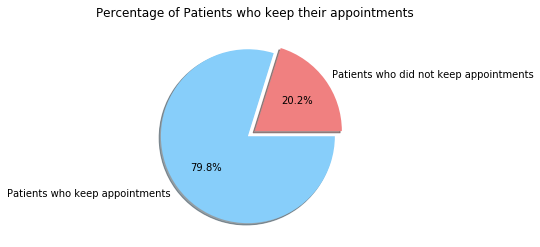

Number of patients who keep their appointments: 88203 (79.8%)
Number of patients who missed their appointments: 22311 (20.2%)


More than half of patients tend to keep their appointments


In [53]:
#Plot pie chart to show percentage of patients that keep and did not their appointments 
values =  [prop_showedup, prop_noshowedup]
colors = ['lightskyblue', 'lightcoral']
labels = ['Patients who keep appointments', 'Patients who did not keep appointments']
explode = (0.1,0)
plt.pie(values,colors=colors,labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Percentage of Patients who keep their appointments')
plt.show()

print('Number of patients who keep their appointments: {} ({}%)'.format(total_showedup,round(prop_showedup*100,2)))
print('Number of patients who missed their appointments: {} ({}%)'.format(total_noshowedup,round(prop_noshowedup*100,2)))
print('\n')
print('More than half of patients tend to keep their appointments')

###  Research Question 2: Which Gender has a higher turnout rate with their appointments?

In [54]:
#Retrieve total female patients 
female=df_clean.query('gender_new== 0').count()['gender_new']
female

71829

In [55]:
#Retrieve total male patients 
male=df_clean.query('gender_new== 1').count()['gender_new']
male

38685

In [56]:
#Retrieve proportion of total female patients
prop_female=(female/(female+male))
prop_female=round(prop_female,2)
prop_female

0.65

In [57]:
#Retrieve proportion of total male patients
prop_male=(male/(female+male))
prop_male=round(prop_male,2)
prop_male

0.35

Number of Female patients: 71829
Number of Male patients: 38685
Proportion of Female patients: 0.65
Proportion of Male patients: 0.35


Text(0.5, 1.0, 'Distribution of Appointments by Gender Classification')

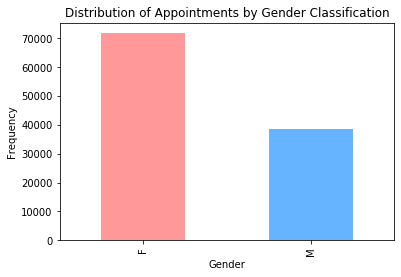

In [58]:
#Print bar to show the distribution of appointments by female and male
print('Number of Female patients: {}'.format(female))
print('Number of Male patients: {}'.format(male))
print('Proportion of Female patients: {}'.format(prop_female))
print('Proportion of Male patients: {}'.format(prop_male))

#Distribution of patients by female and male
gender_bar=df_clean['gender'].value_counts().plot(kind ='bar', color=['#ff9999','#66b3ff'])  #Color source:https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
gender_bar.set_ylabel("Frequency")
gender_bar.set_xlabel("Gender")
gender_bar.set_title('Distribution of Appointments by Gender Classification')

In [59]:
#Retrieve total female patients that kept their appointment
showedup_female=df_showedup.query('gender_new== 0').count()['gender_new']
showedup_female

57241

In [60]:
#Retrieve total male patients that kept their appointment
showedup_male=df_showedup.query('gender_new== 1').count()['gender_new']
showedup_male

30962

In [61]:
#Retrieve total female patients that did not keep their appointment
noshowedup_female=df_noshowedup.query('gender_new== 0').count()['gender_new']
noshowedup_female

14588

In [62]:
#Retrieve total male patients that did not keep their appointment
noshowedup_male=df_noshowedup.query('gender_new== 1').count()['gender_new']
noshowedup_male

7723

In [63]:
#proportion of female patients that showed up for their appointment
prop_showedup_female=(showedup_female/(female+male))
prop_showedup_female=round(prop_showedup_female,3)
prop_showedup_female

0.518

In [64]:
#proportion of male patients that showed up for their appointment
prop_showedup_male=(showedup_male/(female+male))
prop_showedup_male=round(prop_showedup_male,3)
prop_showedup_male

0.28

In [65]:
#proportion of female patients that missed their appointment
prop_noshowedup_female=(noshowedup_female/(female+male))
prop_noshowedup_female=round(prop_noshowedup_female,3)
prop_noshowedup_female

0.132

In [66]:
#proportion of male patients that missed their appointment
prop_noshowedup_male=(noshowedup_male/(female+male))
prop_noshowedup_male=round(prop_noshowedup_male,3)
prop_noshowedup_male

0.07

In [67]:
#Retrieve the gender of patients with highest turnout 
if showedup_female > showedup_male:
                        gender_turnout_max ="Female"
elif showedup_female < showedup_male:
                        gender_turnout_max ="Male"
print(gender_turnout_max)

Female


In [68]:
#Retrieve the gender of patients with lowest turnout 
if noshowedup_female > noshowedup_male:
                        gender_turnout_min ="Female"
elif noshowedup_female < noshowedup_male:
                        gender_turnout_main ="Male"
print(gender_turnout_min)

Female


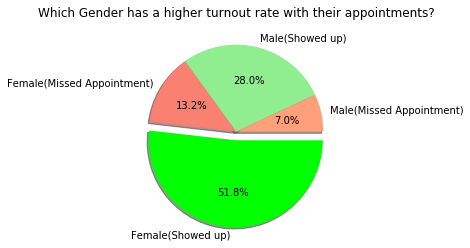

Looks like Female patients are more likely to keep their appointments
Looks like Female patients are more likely to miss their appointments


Number of Female patients who keep their appointments: 57241 (51.8%)
Number of Female patients who missed their appointments: 14588 (13.2%)
Number of Male patients who keep their appointments: 30962 (28.0%)
Number of Male patients who missed their appointments: 7723 (7.0%)


In [69]:
#Plot bar to show appointment turnouts by gender
values = [showedup_female,noshowedup_female,showedup_male,noshowedup_male]
colors = ['lime', 'salmon' ,'lightgreen', 'lightsalmon']
labels = ['Female(Showed up)', 'Female(Missed Appointment)','Male(Showed up)','Male(Missed Appointment)']
explode = (0.1,0,0,0)
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, autopct='%1.1f%%',counterclock=False,  shadow=True)
plt.title("Which Gender has a higher turnout rate with their appointments?")
plt.show()

print('Looks like {} patients are more likely to keep their appointments'.format(gender_turnout_max))
print('Looks like {} patients are more likely to miss their appointments'.format(gender_turnout_min)) 
print('\n')
print('Number of Female patients who keep their appointments: {} ({}%)'.format(showedup_female,round(prop_showedup_female*100,2)))
print('Number of Female patients who missed their appointments: {} ({}%)'.format(noshowedup_female,round(prop_noshowedup_female*100,2)))
print('Number of Male patients who keep their appointments: {} ({}%)'.format(showedup_male,round(prop_showedup_male*100,2)))
print('Number of Male patients who missed their appointments: {} ({}%)'.format(noshowedup_male,round(prop_noshowedup_male*100,2)))

### Research Question 3: What is the Relationship between Generation and Appointment Turnouts?


In [70]:
#Find the average age for patients that show up to their appointment
age_showedup=df_showedup['age'].describe()
age_showedup

count    88203.000000
mean        37.787297
std         23.334275
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        100.000000
Name: age, dtype: float64

In [71]:
#Find the average age for patients that did not show up to their appointment
age_noshowedup=df_noshowedup['age'].describe()
age_noshowedup

count    22311.000000
mean        34.307023
std         21.946550
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max         98.000000
Name: age, dtype: float64

In [72]:
# Assign values to dataframe in this question
age_showedup=df_showedup
age_noshowedup=df_noshowedup

The average age of patients who kept their appointment is 38 years old
The highest age of patients kept their appointment is 100 years old


The average age of patients who did not keep their appointment is 34 years old
The highest age of patients who did not keep their appointment is 98 years old




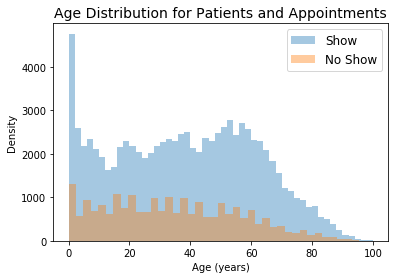

In [73]:
#Plot bar : age distribution for patients and appointments

sns.distplot(age_showedup['age'], kde = False,  label='Show')
sns.distplot(age_noshowedup['age'], kde = False, label='No Show')
plt.legend(prop={'size': 12})
plt.title('Age Distribution for Patients and Appointments', fontsize=14)
plt.xlabel('Age (years)')
plt.ylabel('Density')

print('The average age of patients who kept their appointment is {} years old'.format
      (round(age_showedup['age'].mean()),2))
print('The highest age of patients kept their appointment is {} years old'.format
      (age_showedup['age'].max()))
print('\n')
print('The average age of patients who did not keep their appointment is {} years old'.format
      (round(age_noshowedup['age'].mean())))
print('The highest age of patients who did not keep their appointment is {} years old'.format
      (age_noshowedup['age'].max()))
print('\n')

In [74]:
# Group generations and their appointment status
generation=df_clean.groupby(['age_class','keep_appointment']).size().unstack()
generation

keep_appointment,0,1
age_class,,
Baby Boomers,4086,21197
Gen X,3454,13935
Gen Y,6323,21108
Gen Z,7094,24752
Silent,1354,7211


In [75]:
# Get total of generation that showed up for their appointment
generation_showedup=generation[1].sum()
generation_showedup

88203

In [76]:
# Get total of generation that missed up for their appointment
generation_noshowedup=generation[0].sum()
generation_noshowedup

22311

In [77]:
#Calculate proportions by generation
generation['prop_gen_showedup']=round(generation[1]/df_clean.shape[0],2)
generation['prop_gen_noshowedup']=round(generation[0]/df_clean.shape[0],2)
generation['perc_gen_showedup']=generation['prop_gen_showedup']*100
generation['perc_gen_noshowedup']=generation['prop_gen_noshowedup']*100
generation

keep_appointment,0,1,prop_gen_showedup,prop_gen_noshowedup,perc_gen_showedup,perc_gen_noshowedup
age_class,,,,,,
Baby Boomers,4086,21197,0.19,0.04,19.0,4.0
Gen X,3454,13935,0.13,0.03,13.0,3.0
Gen Y,6323,21108,0.19,0.06,19.0,6.0
Gen Z,7094,24752,0.22,0.06,22.0,6.0
Silent,1354,7211,0.07,0.01,7.0,1.0


In [78]:
#Retrieve proportions for show ups and assign values for bar chart plotting
prop_showedup_babyboomers=generation.iloc[0,2]
prop_showedup_genx=generation.iloc[1,2]
prop_showedup_geny=generation.iloc[2,2]
prop_showedup_genz=generation.iloc[3,2]
prop_showedup_silent=generation.iloc[4,2]
print(prop_showedup_babyboomers)
print(prop_showedup_genx)
print(prop_showedup_geny)
print(prop_showedup_genz)
print(prop_showedup_silent)

0.19
0.13
0.19
0.22
0.07


In [79]:
#Retrieve proportions for no-shows and assign values for bar chart plotting
prop_noshowedup_babyboomers=generation.iloc[0,3]
prop_noshowedup_genx=generation.iloc[1,3]
prop_noshowedup_geny=generation.iloc[2,3]
prop_noshowedup_genz=generation.iloc[3,3]
prop_noshowedup_silent=generation.iloc[4,3]
print(prop_noshowedup_babyboomers)
print(prop_noshowedup_genx)
print(prop_noshowedup_geny)
print(prop_noshowedup_genz)
print(prop_noshowedup_silent)

0.04
0.03
0.06
0.06
0.01


In [80]:
#Assign values for use in bar chart 
proportion_generation_showedup=[ prop_showedup_babyboomers,
                                prop_showedup_genx,
                                prop_showedup_geny,
                                prop_showedup_genz,
                                prop_showedup_silent]

proportion_generation_noshowedup=[prop_noshowedup_babyboomers,
                                prop_noshowedup_genx,
                                prop_noshowedup_geny,
                                prop_noshowedup_genz,
                                prop_noshowedup_silent]

ind = np.arange(len(proportion_generation_noshowedup))  # the x locations for the groups
width = 0.35       # the width of the bars

Generations and Percentage that showed up for their appointment:
Generation Silent:         7.000000000000001 %
Generation Baby Boomers:   19.0 %
Generation  X:             13.0 %
Generation  Y:             19.0 %
Generation  Z:             22.0 %


Generations and Percentage that missed their appointment:
Generation Silent:         1.0 %
Generation Baby Boomers:   4.0 %
Generation  X:             3.0 %
Generation  Y:             6.0 %
Generation  Z:             6.0 %


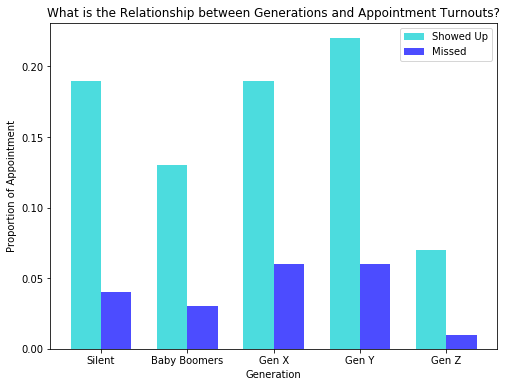

In [81]:
#Plot bar chart to display generations and their appointment turnouts
plt.figure(figsize=(8,6))

labels = ['Silent', 'Baby Boomers','Gen X','Gen Y','Gen Z']; # xtick labels
disability_noshowedup_bars = plt.bar(ind, proportion_generation_showedup, width, color='darkturquoise', alpha=.7, label='Showed Up')
illness_noshowedup_bar = plt.bar(ind + width, proportion_generation_noshowedup, width, color='b', alpha=.7, label='Missed')


plt.title("What is the Relationship between Generations and Appointment Turnouts?")
plt.ylabel('Proportion of Appointment');
plt.xlabel('Generation')

locations = ind + width / 2  # xtick locations
plt.xticks(locations, labels)

plt.legend()


print("Generations and Percentage that showed up for their appointment:")

print('Generation Silent:         {} %'.format(generation.iloc[4,4]))
print('Generation Baby Boomers:   {} %'.format(generation.iloc[0,4]))
print('Generation  X:             {} %'.format(generation.iloc[1,4]))
print('Generation  Y:             {} %'.format(generation.iloc[2,4]))
print('Generation  Z:             {} %'.format(generation.iloc[3,4]))
print('\n')
print("Generations and Percentage that missed their appointment:")
print('Generation Silent:         {} %'.format(generation.iloc[4,5]))
print('Generation Baby Boomers:   {} %'.format(generation.iloc[0,5]))
print('Generation  X:             {} %'.format(generation.iloc[1,5]))
print('Generation  Y:             {} %'.format(generation.iloc[2,5]))
print('Generation  Z:             {} %'.format(generation.iloc[3,5]))


### Research Question 4: Do people keep their appointment more on a particular day?

In [83]:
#Create new dataframe to list out totals of patients who showed up and did not show up based on day
#appointment_day = 0 is Monday......5 is Saturday
day_appointment =df_clean.groupby(['appointment_day', 'keep_appointment']).size().unstack()
day_appointment=day_appointment.sort_values(by=['appointment_day'], ascending=True)
day_appointment

keep_appointment,0,1
appointment_day,,
0,4688,18023
1,5150,20487
2,5092,20774
3,3335,13908
4,4037,14981
5,9,30


In [84]:
#Retrieve sum of patients who showed up for appointment by days
totalshowedupbyday=day_appointment[1].sum()
totalshowedupbyday

88203

In [85]:
#Retrieve sum of patients who did not show up for appointment by days
totalnoshowedupbyday=day_appointment[0].sum()
totalnoshowedupbyday

22311

In [86]:
#Calculate proportions of patients who attended appointments and did not attend based on days
# 0 denotes patient missed their appointment
# 1 denotes patient who kept their appointment

day_appointment['prop_day_showedup']=round(day_appointment[1]/totalshowedupbyday,5)
day_appointment['prop_day_noshowedup']=round(day_appointment[0]/totalnoshowedupbyday,5)
day_appointment['perc_day_showedup']=day_appointment['prop_day_showedup']*100
day_appointment['perc_day_noshowedup']=day_appointment['prop_day_noshowedup']*100

day_appointment

keep_appointment,0,1,prop_day_showedup,prop_day_noshowedup,perc_day_showedup,perc_day_noshowedup
appointment_day,,,,,,
0,4688,18023,0.20434,0.21012,20.434,21.012
1,5150,20487,0.23227,0.23083,23.227,23.083
2,5092,20774,0.23552,0.22823,23.552,22.823
3,3335,13908,0.15768,0.14948,15.768,14.948
4,4037,14981,0.16985,0.18094,16.985,18.094
5,9,30,0.00034,0.00040,0.034,0.040


In [87]:
#Get the minimum turnout rate by day
day_turnout_min=day_appointment.groupby('appointment_day').min()['prop_day_showedup']
day_turnout_min

appointment_day
0    0.20434
1    0.23227
2    0.23552
3    0.15768
4    0.16985
5    0.00034
Name: prop_day_showedup, dtype: float64

In [88]:
#assign values for bar plotting
proportion_day_showedup=day_appointment['prop_day_showedup']
proportion_day_noshowedup=day_appointment['prop_day_noshowedup']

ind = np.arange(len(proportion_day_showedup))  
width = 0.3  

Number of patients who turned up by day:
Monday:    18023 (20.434%)
Tuesday:   20487 (23.227%)
Wednesday: 20774 (23.552%)
Thursday:  13908 (15.767999999999999%)
Friday:    14981 (16.985%)
Saturday:  30 (0.034%)


Number of patients who did not turn by day:
Monday:    4688 (21.012%)
Tuesday:   5150 (23.083000000000002%)
Wednesday: 5092 (22.823%)
Thursday:  3335 (14.948%)
Friday:    4037 (18.093999999999998%)
Saturday:  9 (0.04%)


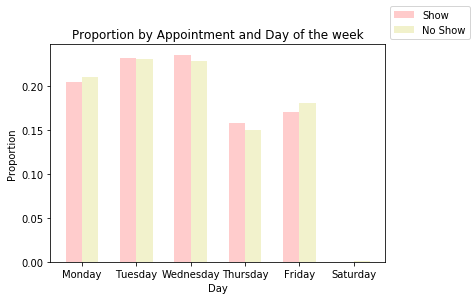

In [89]:
# plot bars
red_bars = plt.bar(ind, proportion_day_showedup, width, color='r', alpha=.2, label='Show')
yellow_bars = plt.bar(ind + width, proportion_day_noshowedup, width, color='y', alpha=.2, label='No Show')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Day')
plt.title('Proportion by Appointment and Day of the week')
locations = ind + width / 2  # xtick locations
labels = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday"] # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(bbox_to_anchor=(1,1),loc='lower left')

print('Number of patients who turned up by day:')
print('Monday:    {} ({}%)'.format(day_appointment.iloc[0,1],day_appointment.iloc[0,4]))
print('Tuesday:   {} ({}%)'.format(day_appointment.iloc[1,1],day_appointment.iloc[1,4]))
print('Wednesday: {} ({}%)'.format(day_appointment.iloc[2,1],day_appointment.iloc[2,4]))
print('Thursday:  {} ({}%)'.format(day_appointment.iloc[3,1],day_appointment.iloc[3,4]))
print('Friday:    {} ({}%)'.format(day_appointment.iloc[4,1],day_appointment.iloc[4,4]))
print('Saturday:  {} ({}%)'.format(day_appointment.iloc[5,1],day_appointment.iloc[5,4]))
print('\n')
print('Number of patients who did not turn by day:')
print('Monday:    {} ({}%)'.format(day_appointment.iloc[0,0],day_appointment.iloc[0,5]))
print('Tuesday:   {} ({}%)'.format(day_appointment.iloc[1,0],day_appointment.iloc[1,5]))
print('Wednesday: {} ({}%)'.format(day_appointment.iloc[2,0],day_appointment.iloc[2,5]))
print('Thursday:  {} ({}%)'.format(day_appointment.iloc[3,0],day_appointment.iloc[3,5]))
print('Friday:    {} ({}%)'.format(day_appointment.iloc[4,0],day_appointment.iloc[4,5]))
print('Saturday:  {} ({}%)'.format(day_appointment.iloc[5,0],day_appointment.iloc[5,5]))

###  Research Question 5: Do Average Waiting Days Influence Patients' Turnouts?

In [90]:
#Retrieve average number of days in between scheduled date and appointment date for no-shows
# including zero waiting day
showedup_waitingdays=df_showedup.mean()['appointment_waiting_days']
showedup_waitingdays

8.754962983118489

In [91]:
#Retrieve average number of days in between scheduled date and appointment date for no-shows
# including zero waiting day
noshowedup_waitingdays=df_noshowedup['appointment_waiting_days'].mean()
noshowedup_waitingdays

15.835641611761014

The average days between scheduled date and appointment date 
for patients who kept their appointment is 9.0 days


The average days between scheduled date and appointment date 
for patients who missed their appointment is 16 days


It can be seen that shorter waiting days have a higher turn up rate.




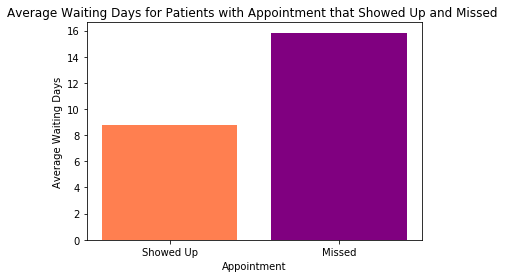

In [92]:
#Plot average number of days in between scheduled date and appointment date 
#for both patients that showed up and did not show up for their appointments
locations = [1, 2]
heights = [showedup_waitingdays, noshowedup_waitingdays]
labels = ['Showed Up', 'Missed']

plt.bar(locations, heights, tick_label=labels, color=['coral','purple'])
plt.title('Average Waiting Days for Patients with Appointment that Showed Up and Missed ')
plt.xlabel('Appointment')
plt.ylabel('Average Waiting Days');

print('The average days between scheduled date and appointment date \nfor patients who kept their appointment is {} days'.format(round(showedup_waitingdays)))
print('\n')
print('The average days between scheduled date and appointment date \nfor patients who missed their appointment is {} days'.format(round(noshowedup_waitingdays)))
print('\n')
print('It can be seen that shorter waiting days have a higher turn up rate.')
print('\n')


###  Research Question 6: Does an illness or disability or both, influence a patient's appointment turnout rate?

> There are 3 scenarios here:
> - patients with illness(s) and without disability
> - patients without any illness(s) and with disability
> - patients with illness(s) and with disability


In [93]:
#Retrieve data for patients that are only with illnesses,only with disability, and both illnesses & disability
ailments=df_clean.query('illness ==0 and disability ==1 | illness ==1 and disability ==0 | illness_disability ==1')
ailments.shape

(26405, 14)

In [94]:
#Retrieve data for patients that 
ailments =ailments.groupby(['illness','disability','illness_disability','keep_appointment']).size().unstack()
ailments 

keep_appointment                          0      1
illness disability illness_disability             
0       1          0                    230    961
1       0          0                   4309  19861
        1          1                    172    872

In [95]:
#Calculate total patientsthat are only with illnesses,only with disability, and both illnesses & disability 
# that showed up for their appointments
ailments_showedup=ailments[1].sum()
ailments_showedup

21694

In [96]:
#Calculate total patients that are only with illnesses,only with disability, and both illnesses & disability 
# that did not show up for their appointments
ailments_noshowedup=ailments[0].sum()
ailments_noshowedup

4711

In [97]:
#Calculate proportions for all three conditions
ailments['prop_showedup']=round(ailments[1]/ailments_showedup,2)
ailments['prop_noshowedup']=round(ailments[0]/ailments_noshowedup,2)
ailments['perc_showedup']=ailments['prop_showedup']*100
ailments['perc_noshowedup']=ailments['prop_noshowedup']*100
ailments

keep_appointment                          0      1  prop_showedup  \
illness disability illness_disability                               
0       1          0                    230    961           0.04   
1       0          0                   4309  19861           0.92   
        1          1                    172    872           0.04   

keep_appointment                       prop_noshowedup  perc_showedup  \
illness disability illness_disability                                   
0       1          0                              0.05            4.0   
1       0          0                              0.91           92.0   
        1          1                              0.04            4.0   

keep_appointment                       perc_noshowedup  
illness disability illness_disability                   
0       1          0                               5.0  
1       0          0                              91.0  
        1          1                               4.0

In [98]:
#Retrieve proportions for patients with illnesses,only with disability, and both illnesses & disability 
# Patients who keep their appointment
prop_showedup_disability=ailments.iloc[0,2]
prop_showedup_illness=ailments.iloc[1,2]
prop_showedup_illness_disability=ailments.iloc[2,2]
print(prop_showedup_disability)
print(prop_showedup_illness)
print(prop_showedup_illness_disability)

0.04
0.92
0.04


In [99]:
#Retrieve proportions for patients with illnesses,only with disability, and both illnesses & disability 
# Patients who do not keep their appointment
prop_noshowedup_disability=ailments.iloc[0,3]
prop_noshowedup_illness=ailments.iloc[1,3]
prop_noshowedup_illness_disability=ailments.iloc[2,3]

print(prop_noshowedup_disability)
print(prop_noshowedup_illness)
print(prop_noshowedup_illness_disability)

0.05
0.91
0.04


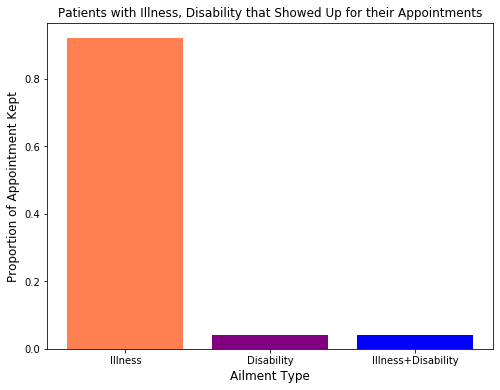

In [100]:
# Plot bar graph to show the show up rates comparison of all 3 factors
plt.figure(figsize=(8,6)) 

locations = [1, 2, 3]
heights=[prop_showedup_illness, prop_showedup_disability, prop_showedup_illness_disability]
labels = ['Illness', 'Disability','Illness+Disability']

plt.bar(locations, heights, tick_label=labels, color=['coral','purple','blue'])
plt.title('Patients with Illness, Disability that Showed Up for their Appointments')
plt.xlabel('Ailment Type', fontsize=12)
plt.ylabel('Proportion of Appointment Kept',fontsize='large');

In [101]:
#Assign values for use in bar chart 
proportion_ailments_showedup=[prop_showedup_illness, 
                              prop_showedup_disability,
                              prop_showedup_illness_disability]

proportion_ailments_noshowedup=[prop_noshowedup_illness,
                                prop_noshowedup_disability,
                                prop_noshowedup_illness_disability]

ind = np.arange(len(proportion_ailments_noshowedup))  # the x locations for the groups
width = 0.35       # the width of the bars

Patients' ailment type and Percentage that showed up for their appointment
Illness:                92.0 %
Disability:              4.0 %
Illness and Disability:  4.0 %


Patients' ailment type and Percentage that missed their appointment
Illness:                91.0 %
Disability:              5.0 %
Illness and Disability:  4.0 %


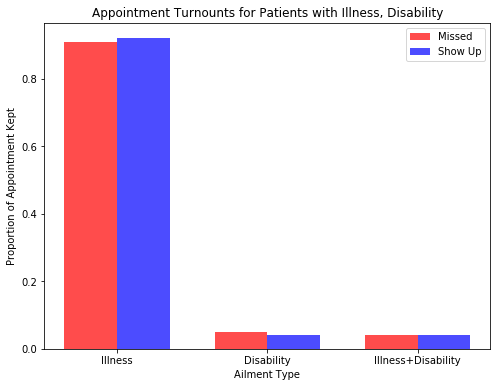

In [102]:
#Plot bar to display appointment turnouts (show ups and misses) for patients categorised as below:
# Illness
#  Disability
#   Illness and Disability

plt.figure(figsize=(8,6))

labels = ['Illness', 'Disability','Illness+Disability']; # xtick labels
disability_noshowedup_bars = plt.bar(ind, proportion_ailments_noshowedup, width, color='r', alpha=.7, label='Missed')
illness_noshowedup_bar = plt.bar(ind + width, proportion_ailments_showedup, width, color='b', alpha=.7, label='Show Up')


plt.title("Appointment Turnounts for Patients with Illness, Disability")
plt.ylabel('Proportion of Appointment Kept');
plt.xlabel('Ailment Type')

locations = ind + width / 2  # xtick locations
plt.xticks(locations, labels)

plt.legend()


print("Patients' ailment type and Percentage that showed up for their appointment")

print('Illness:                {} %'.format(ailments.iloc[1,4]))
print('Disability:              {} %'.format(ailments.iloc[0,4]))
print('Illness and Disability:  {} %'.format(ailments.iloc[2,4]))
print('\n')
print("Patients' ailment type and Percentage that missed their appointment")
print('Illness:                {} %'.format(ailments.iloc[1,5]))
print('Disability:              {} %'.format(ailments.iloc[0,5]))
print('Illness and Disability:  {} %'.format(ailments.iloc[2,5]))


###  Research Question 7: Do healthy patients tend to have a higher appointment show up rates?

**Note**
 -  Healthy patients are determined by the column illness. When it is zero, the patient is classified as healthy
 -  Unhealthy patients are individuals recorded with '1' in column illness 

In [103]:
#Retrieve total patients who are healthy(zero illness) and showed up for their appointment
healthy_showedup=df_showedup.query('illness == 0').shape[0]
healthy_showedup

67470

In [104]:
#Retrieve total patients who are unhealthy(with illness) and showed up for their appointment
unhealthy_showedup=df_showedup.query('illness == 1').shape[0]
unhealthy_showedup

20733

In [105]:
total_health_showedup=healthy_showedup+unhealthy_showedup
total_health_showedup

88203

In [106]:
#Calculate proportion of healthy and unhealthy patients who showed up for their appointments
prop_healthy_showedup=round((healthy_showedup/(total_health_showedup)),2)
prop_unhealthy_showedup=round((unhealthy_showedup/(total_health_showedup)),2)
prop_healthy_showedup
prop_unhealthy_showedup

0.24

This bar accounts for patients as following:
 Healthy patients are patients who have not been recorded with diabetes, hypertension and alcoholism
 Unhealthy patients are patients who have been recorded with diabetes, hypertension and/or alcoholism


Total healthy patients in this dataset:    85300 people
Total unhealthy patients in this dataset:  25214 people


Total healthy patients that showed up for their appointment:   67470 people (76%)
Total unhealthy patients that showed up for their appointment: 20733 people (24%)


The answer to the question is Yes! Healthy patients are more likely to keep their appointments!




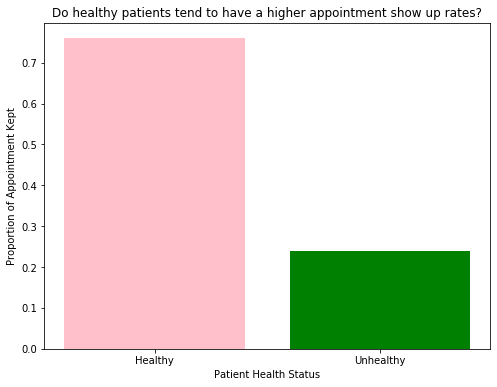

In [107]:
#Plot bar for healthy vs unhealthy patients and their appointment turnouts
print('This bar accounts for patients as following:')
print(' Healthy patients are patients who have not been recorded with diabetes, hypertension and alcoholism')
print(' Unhealthy patients are patients who have been recorded with diabetes, hypertension and/or alcoholism')
print('\n')
print('Total healthy patients in this dataset:    {} people'.format(df_clean.query('illness ==0').shape[0]))
print('Total unhealthy patients in this dataset:  {} people'.format(df_clean.query('illness >0').shape[0]))
print('\n')
print('Total healthy patients that showed up for their appointment:   {} people ({}%)'.format(healthy_showedup,round(prop_healthy_showedup*100)))
print('Total unhealthy patients that showed up for their appointment: {} people ({}%)'.format(unhealthy_showedup,round(prop_unhealthy_showedup*100)))
print('\n')

print('Based on the numbers, we could say Yes! Healthy patients are more likely to keep their appointments!')
print('\n')

# Plot bar graph to show 
plt.figure(figsize=(8,6)) 
labels = ['Healthy', 'Unhealthy']
means=[prop_healthy_showedup, prop_unhealthy_showedup]

plt.bar( labels, means,  color=['pink','green'])
plt.title('Do healthy patients tend to have a higher appointment show up rates?')
plt.xlabel("Patient Health Status")
plt.ylabel('Proportion of Appointment Kept');


###  Research Question 8: Do text reminders play a role in appointment show up rates?

In [116]:
#Retrieve total patients who received sms and showed up for their appointment
sms_showedup=df_showedup.query('sms_received > 0').shape[0]
sms_showedup

25697

In [117]:
#Retrieve total patients who received sms and showed up for their appointment
nosms_showedup=df_showedup.query('sms_received < 1').shape[0]
nosms_showedup

62506

In [118]:
#Calculate proportion of patients who did not receive sms and showed up for their appointment
prop_nosms_showedup=round((nosms_showedup/(total_showedup)),2)
prop_nosms_showedup

0.71

In [119]:
#Calculate proportion of patients who received sms and showed up for their appointment
prop_sms_showedup=round((sms_showedup/(total_showedup)),2)
prop_sms_showedup

0.29

29 % of patients turned up at their appointment when text reminders are sent.
71 % of patients turned up at their appointment without any text reminders sent.
 
Looks like text reminders may not be pivotal in influencing a patient's attendance!


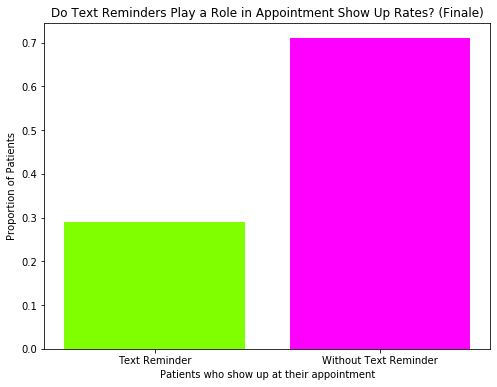

In [121]:
#Plot to show total turnouts for patients that show upt o their appointments
#  when text reminders are sent and not sent

plt.figure(figsize=(8,6))
locations = [1, 2]
heights = [prop_sms_showedup, prop_nosms_showedup]
labels = ['Text Reminder', 'Without Text Reminder']

plt.bar(locations, heights, tick_label=labels, color=['chartreuse','fuchsia'])
plt.title('Do Text Reminders Play a Role in Appointment Show Up Rates? (Finale)')
plt.xlabel('Patients who show up at their appointment')
plt.ylabel('Proportion of Patients');


print('{} % of patients turned up at their appointment when text reminders are sent.'.format(round((prop_sms_showedup)*100),2))
print('{} % of patients turned up at their appointment without any text reminders sent.'.format(round((prop_nosms_showedup)*100),2))
print(" \nLooks like text reminders may not be pivotal in influencing a patient's attendance!")

<a id='conclusions'></a>
## Conclusions

***Limitations***
***
> This analysis does not include inferential statistics techniques and therefore will not be implying causation from correlation.

> The calculations presented in this analysis are based on the number of appointments instead of number of patients. There were duplicate patients with multiple appointments per patient, with the highest being 88 appointments for one patient within the span of 27 days. Therefore, this analysis may not be to the highest of accuracy.

> ***Results of Analysis***
***
> The one thing in common that all the questions posed have, is appointment turnout rates.
This analysis looked at number of turnouts, gender and generation of patients, appointment day, days that run through between scheduled and appointment dates, illness and disability, health status of patients and text reminders.

> -  Based on the variables used to conduct this analysis, close to 80% of the patients showed up to their appointments, where female patients make up the bulk by half. Generation Y is the winner in terms of showing up to their appointments, with Generation Silent (patients aged 75+) have the lowest numbers in missing their appointments, seem to have a better hold in keeping their appointments.

> -  Hump day or better known as Wednesday, appears to have the highest patient turnouts, while it can be seen that patients with lower waiting days tend to show up for the appointment more.

> -  Patients that are only with illness, and no disability or both the former and the latter, are more inclined to keep to the appointments made. 

> -  Looking at the numbers, one might say that healthy patients are serious with their wellbeing. A whopping 76% showed up to their appointments, while patients deemed unhealthy as illness has been indicated in their appointment record takes up the remaining quarter.

> -  Big surprise in this technological age, patients receiving text reminders have a lower turnout rates than patients who do not receive these reminders.

> In essence, it can be seen that there are various factors that influence an appointment turnout. An in-depth statistical analysis would perhaps improve on the interpretation of this dataset.


In [122]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295